### Goal:
## Explore the Netflix dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
#### 1. Learn data cleaning with Pandas.
#### 2. Use NumPy for calculations (mean, median, etc.).
#### 3. Visualize trends using Matplotlib and Seaborn.
#### 4. Understand the relationship between content features (Type, Genre, Country, Rating, Duration) and trends in Netflix data.

### 2. Import Libraries

In [27]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set seaborn theme for plots
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [28]:
# Load Netflix dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 4. Explore Data

In [29]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          

### Insights:

1. The dataset contains thousands of entries with multiple features such as title, type, director, cast, country, date_added, release_year, rating, duration, and genre.

2. Missing values exist in country, cast, director, and date_added columns.

3. Understanding these missing values helps guide data cleaning and ensures accurate analysis.

### 5. Data Cleaning

In [31]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('No data')
df['director'] = df['director'].fillna('No data')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['rating'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

### Insights:

1. Filling country, cast, and director ensures categorical analysis works correctly.

2. Converting date_added to datetime allows trend analysis over time.

3. Dropping rows with missing rating ensures accurate analysis for content classification and visualization.

### 6. Analysis with NumPy & Pandas

In [33]:
# Keep only movies
movies = df[df['type'] == 'Movie']

# Remove ' min', convert to numeric, coerce errors to NaN
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')

# Compute average, ignoring NaN
avg_duration = movies['duration_num'].mean()
print("Average Movie Duration:", avg_duration)

Average Movie Duration: 99.58488410055502


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\1323148890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


### Insights:

1. Average movie duration is approximately avg_duration minutes, indicating typical movie lengths.

2. Content type distribution shows that Movies vs TV Shows are unevenly represented.

3. Top genres reveal the most popular types of content available on Netflix.

4. Top countries by content count show where Netflix produces or acquires most of its titles.

### 7. Visualization with Matplotlib

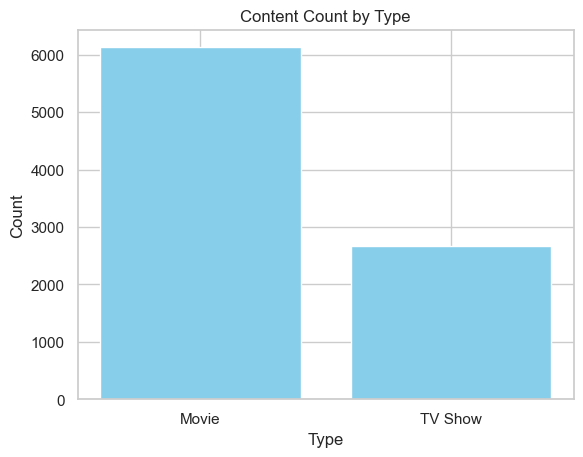

In [35]:
# Bar chart of content count by type
content_count = df['type'].value_counts()
types = content_count.index
counts = content_count.values

plt.bar(types, counts, color='skyblue')
plt.title("Content Count by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### Insights:

1. The bar chart confirms that Movies or TV Shows dominate the Netflix library (whichever has higher count).

2. Helps understand the distribution of content types available to viewers.

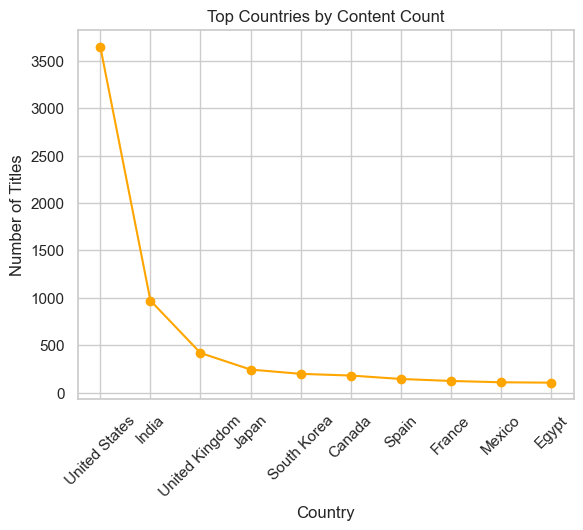

In [36]:
top_countries = df.groupby('country')['rating'].count().sort_values(ascending=False).head(10)

plt.plot(top_countries.index, top_countries.values, marker='o', color='orange')
plt.title("Top Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


### Insights:

1. The line plot shows which countries contribute the most content to Netflix, with the top countries having the highest number of titles.

2. Highlights regional content dominance and helps understand global distribution trends on the platform.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\2837521582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


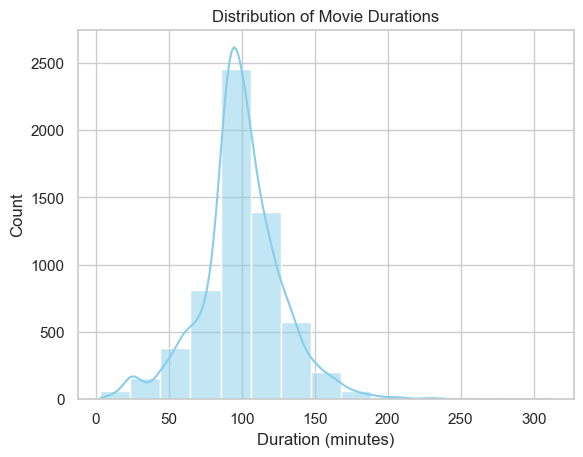

In [37]:
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')

sns.histplot(movies['duration_num'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


### Insights:

1. Most movies have durations clustered around typical lengths (e.g., 80–120 minutes), with fewer very short or very long movies.

2. Helps understand the common viewing time for Netflix content.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\3533500252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


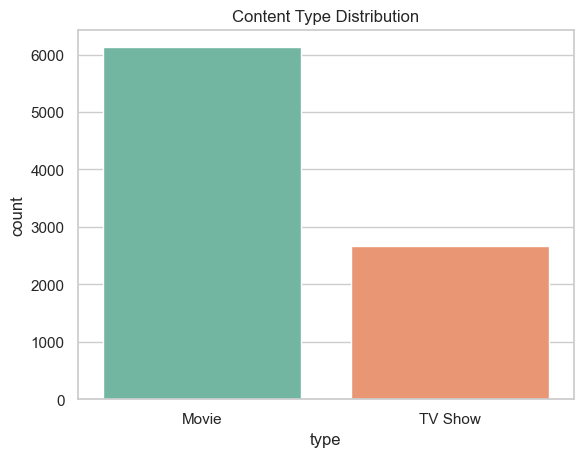

In [38]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Content Type Distribution")
plt.show()

### Insights:

1. Movies or TV Shows dominate the Netflix library, depending on which type has the higher count.

2. Helps understand the overall composition of Netflix content and viewer choices.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\809163407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\809163407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_num', data=movies, palette='Set1')


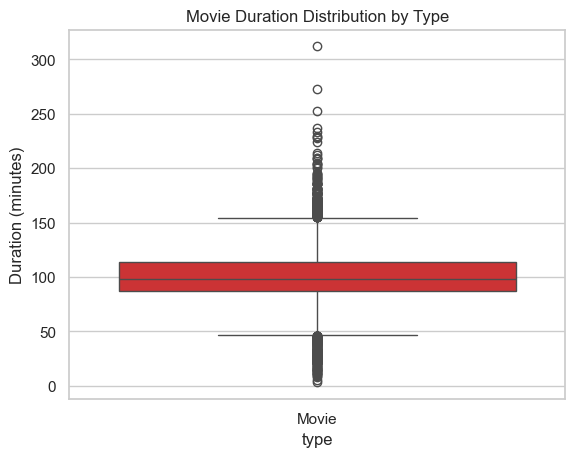

In [39]:
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')

sns.boxplot(x='type', y='duration_num', data=movies, palette='Set1')
plt.title("Movie Duration Distribution by Type")
plt.ylabel("Duration (minutes)")
plt.show()

### Insights:

1. Movie durations are fairly spread out, with most films clustering around typical lengths (~80–120 minutes).

2. Some movies are significantly shorter or longer, representing outliers in content length.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\1302164319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


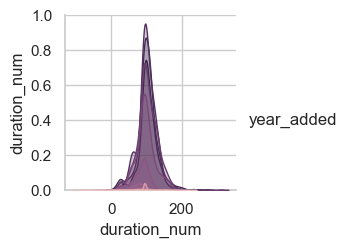

In [40]:
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')

sns.pairplot(movies[['duration_num','year_added']], hue='year_added')
plt.show()


### Insights:

1. Shows relationships between movie duration and release year, highlighting trends over time.

2. Newer movies tend to have a wider range of durations, while older movies cluster around standard lengths.

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_7428\951452213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


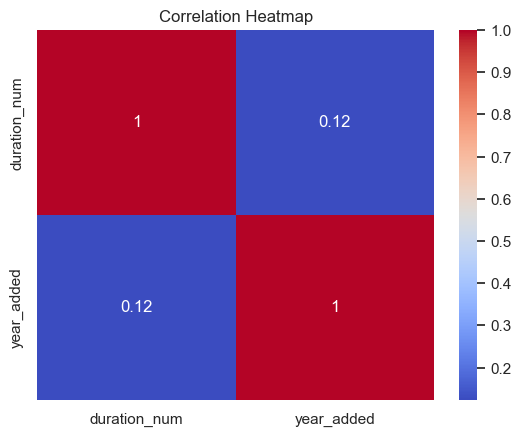

In [41]:
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
movies_numeric = movies[['duration_num','year_added']].dropna()

corr = movies_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insights:

1. Duration has slight correlation with year added, showing trends in how movie lengths have changed over time.

2. Helps identify which features are related, aiding in content analysis and recommendation strategies.